# Introduction to Time Series

## Course Contents 

### Intended audience
This course is intended for you if you are:

A beginner who wants to learn the basics of time series data.

An intermediate learner who has some basic knowledge about time series or Python and wants to explore more advanced forecasting methods.

### Defining time series analysis
The term time series refers to data in which observations are associated with a given moment in time. The evolution of Apple stock prices over the course of a day with the price per hour being the data point is an example of a time series. The daily temperature in Rio de Janeiro during 2021 is another example.

Analyzing time series data means trying to understand how our variable of interest behaves over time by identifying trends, seasonal patterns, and the influence of external factors such as holidays and weather.

### How time series analysis is used
Time series analysis can be used to understand how something changes over time, but it's mostly used to make predictions. By identifying patterns, we can extrapolate them into the future and try to make an educated guess about how that variable will behave.

If we know the average temperature in Rio de Janeiro has been above 30 °C every year during January and February, we can infer that this will also be the case this year. As with any form of inference, this method is prone to error, though we will find out how to measure the amount of error we can expect according to the data we have available.

Here's an example of time series data up to 1961 with forecasts for the next year:

![](Time.jpg)


### Get the Dataset 

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


Many questions pop up just from looking at these rows:

What is the format of the “Date” column? Does “4/1/2015” mean “April 1st” or “January 4th?” In the US it would be the former, while in most other countries it would be the latter.

Where is the data for “4/3/2015,” “4/4/2015,” and “4/5/2015?"

What is the most recent data available?

As you might have noticed, when looking at a time series in a table, sometimes it can be hard to see the big picture. The standard way to visualize time series data is by using line charts.

Text(0.5, 1.0, 'Microsoft stock closing price')

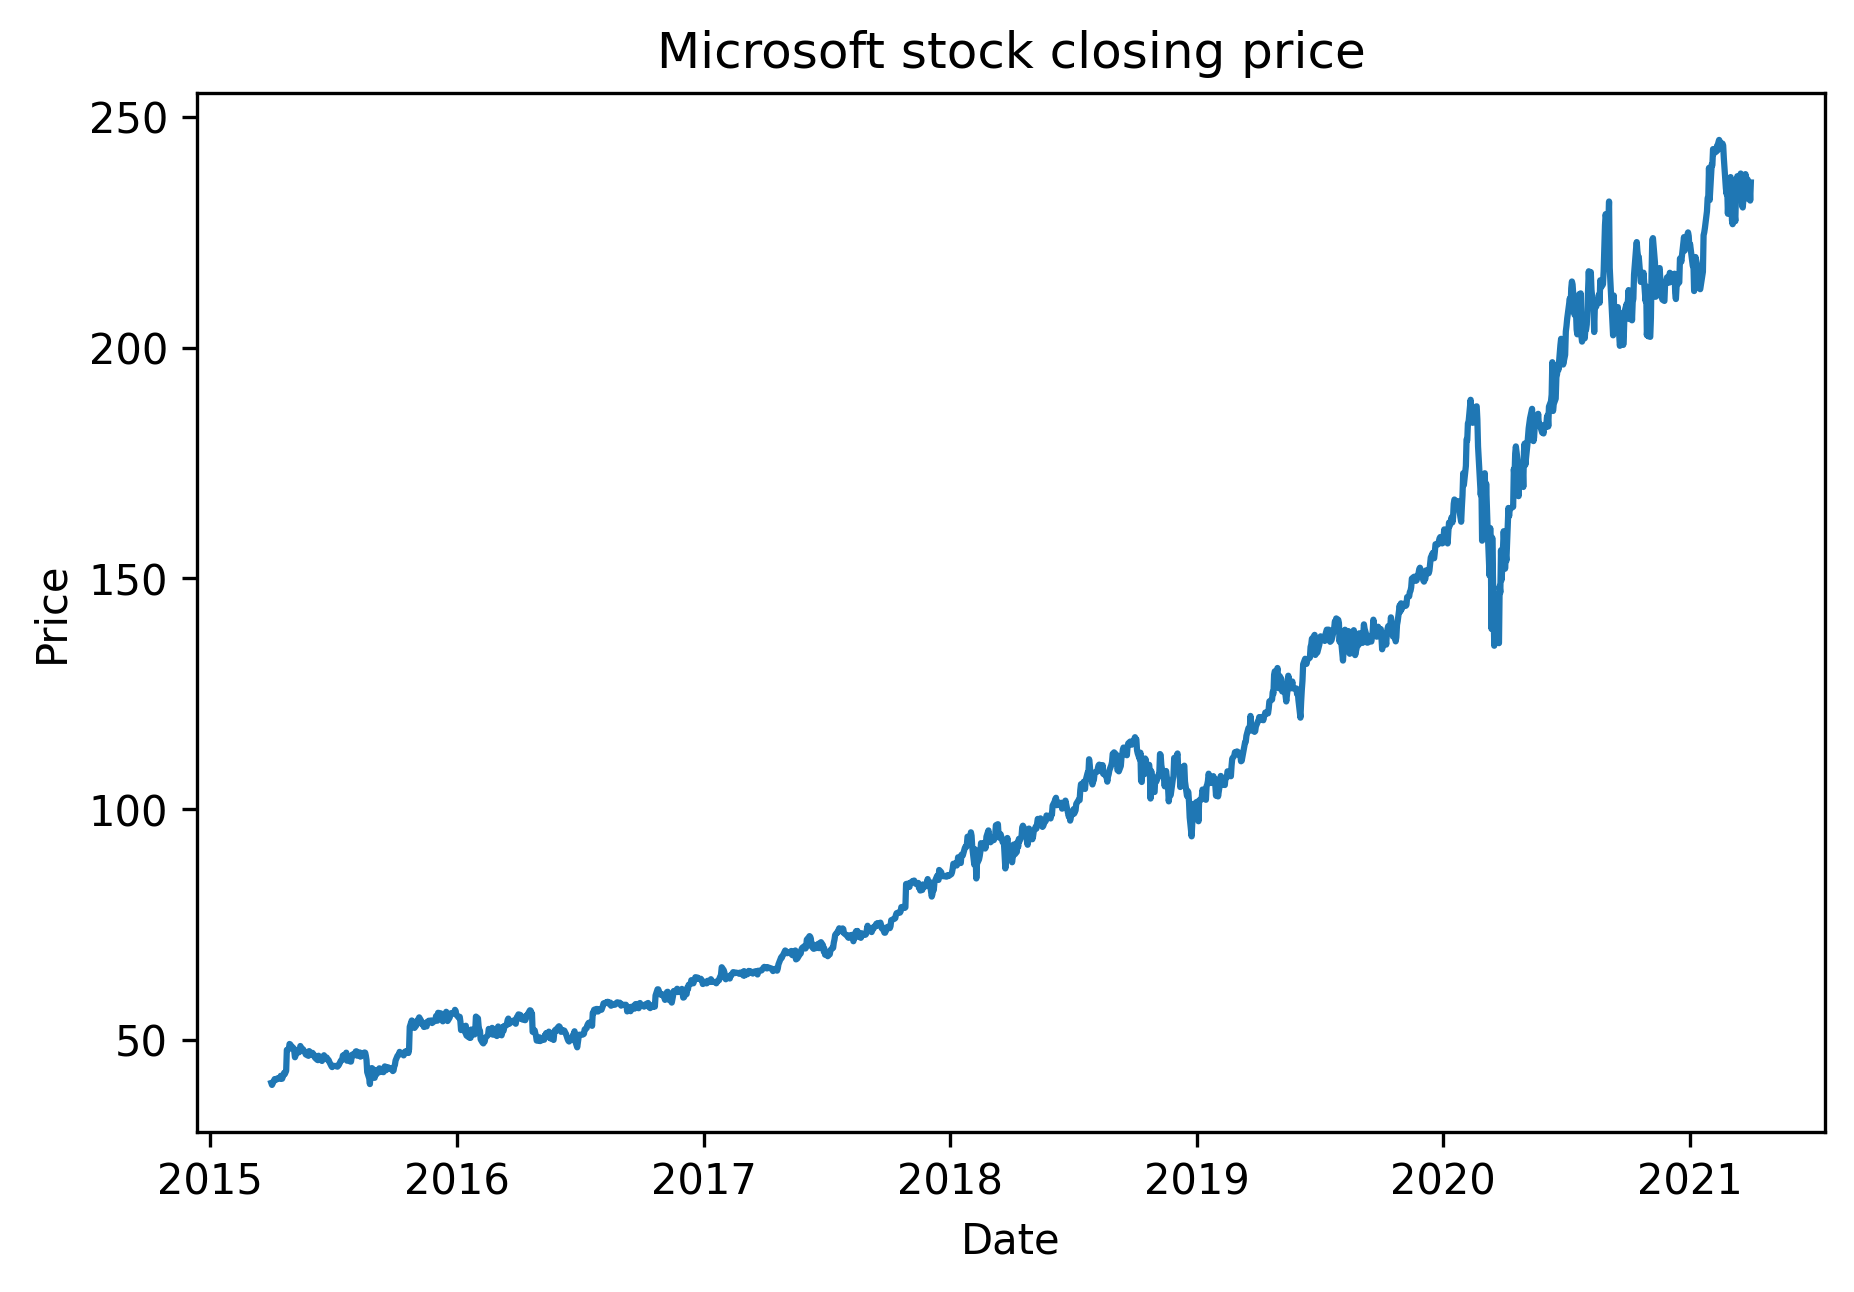

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Setting the Date as index
df = df.set_index('Date')

# Plotting
fig, axe = plt.subplots(figsize=(7, 4.5), dpi=300)
axe.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Microsoft stock closing price")
# fig.savefig("output/output.png")
# plt.close(fig)

As you can see, the line chart gives us a much better overview of the stock prices' data. It goes from 2015 to 2021, and it shows that the stock price has been increasing over time, except for some bumps in 2019 and 2020.

# Time Series Properties
Understand the main properties of time series data, such as frequency, range and trend.

# Frequency
Frequency refers to the level of granularity of the data—for example, is it one observation per hour, per day, per week? It's one of the most important properties regarding time series data, and it also has a direct link with the forecasting task we have.

Imagine we have weekly sales data but need to make daily forecasts. How would we do it? What if we have daily rain level data but need to forecast rain weekly?

Going from high granularity to a lower one is usually easier, but the way we aggregate values will depend on what kind of data we have. Here are some of the most common examples:

From daily sales to weekly sales: We could just sum sales for every day in a week to get the sales for that week.

From daily closing prices of stock to weekly closing prices of stock: Since the closing price is the last price available, we should use, for each week, the closing price of the last day of that week.

From daily minimum temperatures to weekly minimum temperatures: We get the minimum temperature out of all the minimum temperatures for days in that week
Going from a low granularity to a higher one can be more challenging. Imagine trying to go from weekly to daily sales data. If we have no history whatsoever of daily sales, we can take a naive approach and divide weekly sales by 7. Ideally, however, we have some data on daily sales to at least make a proportional split between all the days of the week—for example, 30% of sales get made on a Saturday, 10% on a Sunday, and so on.

Sometimes, it won’t be possible or relevant to go to higher levels of granularity since we'll need to make many assumptions. We may think about why a specific level of granularity is necessary and how we can adapt to it.

In our stock price example, let's try to identify the frequency of the data by running the code below:

In [14]:
df.shape

(1511, 5)

## What is the frequency of the time series data
Even though some days are missing, there’s still one observation per day (and not more)!

# Range
Range refers to how far in the past our data goes and how fresh it is. When we say we have data from 1980 up to last week, we are talking about its range.

Having data that far back in the past can help identify seasonal patterns and smooth out outliers. Imagine trying to identify seasonal patterns but only having one year’s worth of data. It would be impossible to spot those patterns, right? On the other hand, having old data in which the most recent observation is from 2017 might mean we're not considering recent changes or events, such as new regulations or COVID.

Still, in our stock price example, let’s try to identify what the range of the data is by running the code below. Focus on the highlighted lines.

In [15]:
print("First date:", df.index.min())
print("Last date:", df.index.max())
print(df.head(10))

First date: 2015-04-01 16:00:00
Last date: 2021-03-31 16:00:00
                      Open   High    Low  Close    Volume
Date                                                     
2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322
2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476
2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692
2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375
2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438
2015-04-09 16:00:00  41.25  41.62  41.25  41.48  25723861
2015-04-10 16:00:00  41.63  41.95  41.41  41.72  28022002
2015-04-13 16:00:00  41.40  42.06  41.39  41.76  30276692
2015-04-14 16:00:00  41.80  42.03  41.39  41.65  24244382
2015-04-15 16:00:00  41.76  42.46  41.68  42.26  27343581


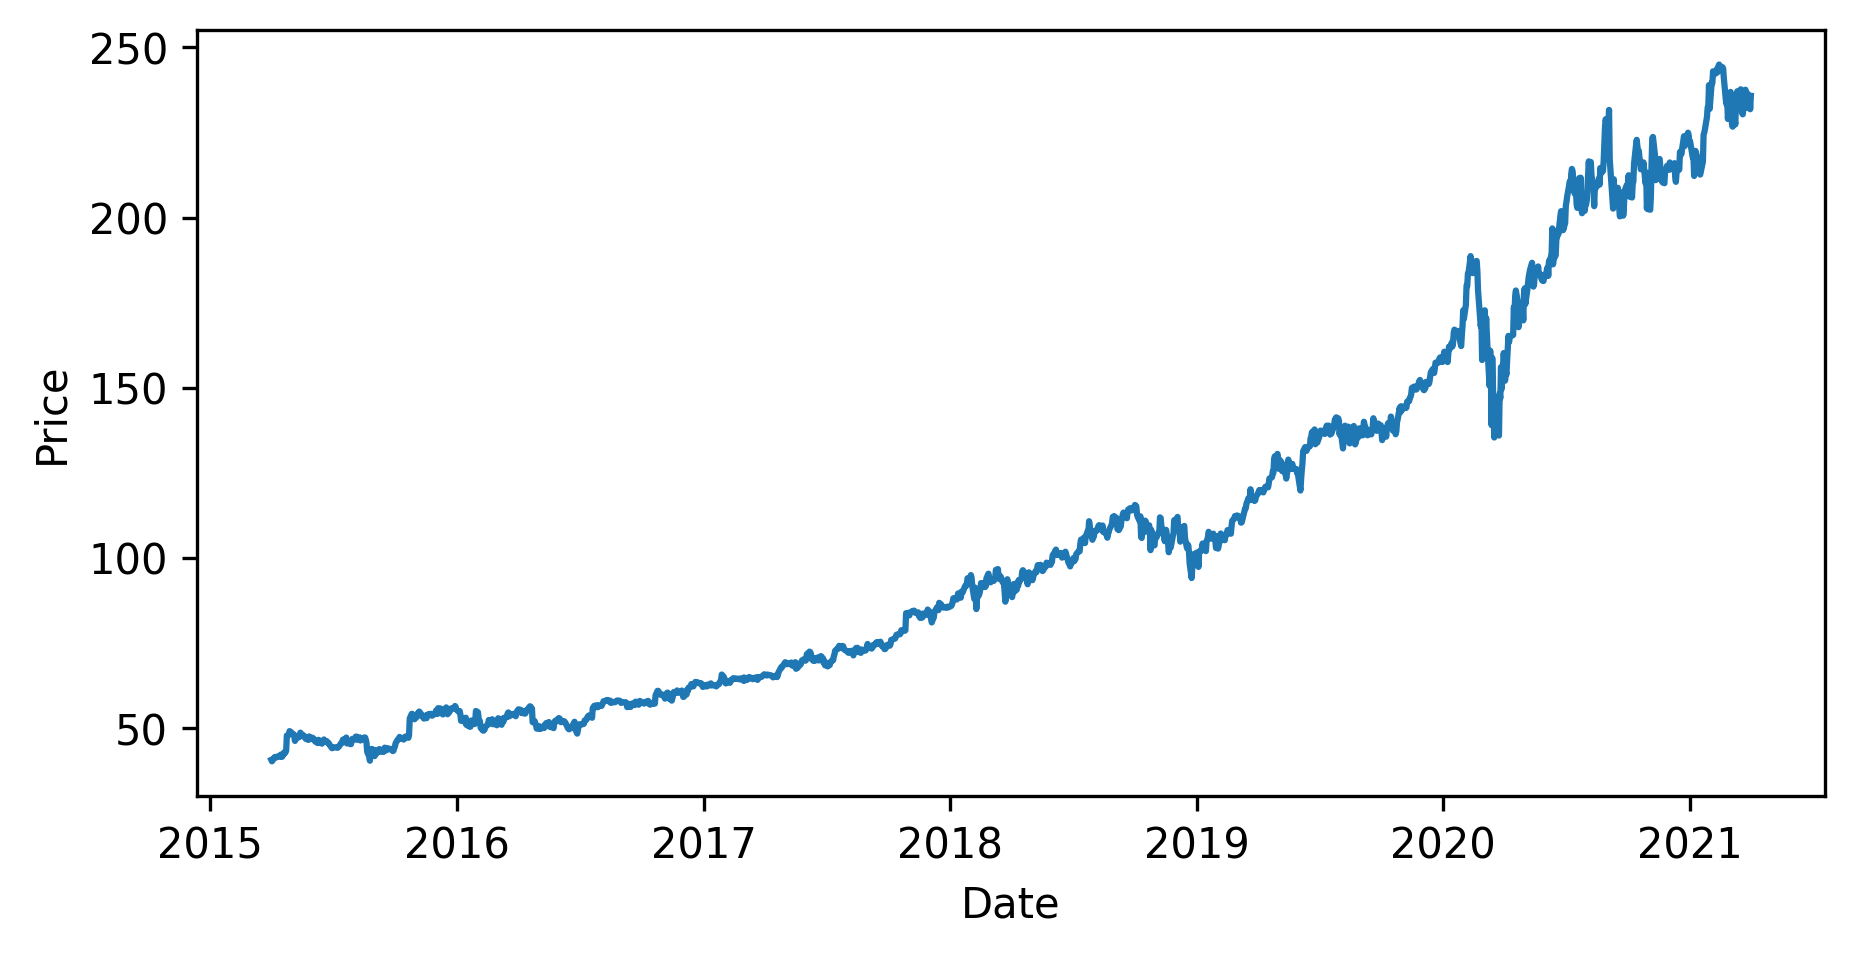

In [16]:
#Plotting
fig, axe = plt.subplots(figsize=(7, 3.5), dpi=300)
axe.plot(df['Close'])

# Labelling 
plt.xlabel("Date")
plt.ylabel("Price")
plt.subplots_adjust(bottom=0.15)
# fig.savefig("output/output.png")
# plt.close(fig)

# Seasonality
Seasonality refers to periodical patterns in the data. Weather data is very seasonal, with average temperatures tending to be close for the same month, regardless of the year. The peak in sales we can see during certain holidays is also a kind of seasonality. Spotting it is usually easy, but it helps to have some domain knowledge to interpret it.

It’s important to keep in mind that a dataset can have multiple seasonal patterns at the same time.

# Filter
Let’s say we want to focus our analysis on only the days when Microsoft stock prices were at least $100. We can do that by replacing the original DataFrame with a filtered version. If our DataFrame is called df, we can filter it by combining df[...] and df['Close']>=100 . The first term indicates we are filtering df, and the second one gives the condition for this filter.

In [17]:
df = df[df['Close']>=100]

print(df)

                       Open    High     Low   Close    Volume
Date                                                         
2018-06-01 16:00:00   99.28  100.86   99.17  100.79  28655624
2018-06-04 16:00:00  101.26  101.86  100.85  101.67  27281623
2018-06-05 16:00:00  102.00  102.33  101.53  102.19  23514402
2018-06-06 16:00:00  102.48  102.60  101.90  102.49  21122917
2018-06-07 16:00:00  102.65  102.69  100.38  100.88  28232197
...                     ...     ...     ...     ...       ...
2021-03-25 16:00:00  235.30  236.94  231.57  232.34  34061853
2021-03-26 16:00:00  231.55  236.71  231.55  236.48  25479853
2021-03-29 16:00:00  236.59  236.80  231.88  235.24  25227455
2021-03-30 16:00:00  233.53  233.85  231.10  231.85  24792012
2021-03-31 16:00:00  232.91  239.10  232.39  235.77  43623471

[703 rows x 5 columns]


In [18]:
df = df[(df['Open']>=100) & (df['Close']<200)]
# The row should respect both conditions

print(df)

                       Open    High     Low   Close    Volume
Date                                                         
2018-06-04 16:00:00  101.26  101.86  100.85  101.67  27281623
2018-06-05 16:00:00  102.00  102.33  101.53  102.19  23514402
2018-06-06 16:00:00  102.48  102.60  101.90  102.49  21122917
2018-06-07 16:00:00  102.65  102.69  100.38  100.88  28232197
2018-06-08 16:00:00  101.09  101.95  100.54  101.63  22165128
...                     ...     ...     ...     ...       ...
2020-06-18 16:00:00  194.00  196.49  194.00  196.32  23061648
2020-06-19 16:00:00  198.59  199.29  194.37  195.15  44441141
2020-06-24 16:00:00  201.60  203.25  196.56  197.84  36740647
2020-06-26 16:00:00  199.73  199.89  194.88  196.33  54675780
2020-06-29 16:00:00  195.78  198.53  193.55  198.44  26701586

[502 rows x 5 columns]


If we want to filter based on dates (which might be the most common case when working with time series), there are two ways depending on whether the dates are the index of the DataFrame (a DatetimeIndex) or just a regular column.

In [24]:
import datetime
# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')


# 1st case: Date is just a column, not the index 
# df1 = df[df['Date']>datetime.date(2016,1,1)]
# print(df1)

# 2nd case: Date is the index of the DataFrame
df = df.set_index('Date')
df2 = df.loc['2016-01-01':]
print(df2)

                       Open    High     Low   Close    Volume
Date                                                         
2016-01-04 16:00:00   54.32   54.80   53.39   54.80  53777963
2016-01-05 16:00:00   54.93   55.39   54.54   55.05  34079674
2016-01-06 16:00:00   54.32   54.40   53.64   54.05  39518863
2016-01-07 16:00:00   52.70   53.49   52.07   52.17  56564852
2016-01-08 16:00:00   52.37   53.28   52.15   52.33  48753969
...                     ...     ...     ...     ...       ...
2021-03-25 16:00:00  235.30  236.94  231.57  232.34  34061853
2021-03-26 16:00:00  231.55  236.71  231.55  236.48  25479853
2021-03-29 16:00:00  236.59  236.80  231.88  235.24  25227455
2021-03-30 16:00:00  233.53  233.85  231.10  231.85  24792012
2021-03-31 16:00:00  232.91  239.10  232.39  235.77  43623471

[1320 rows x 5 columns]


## Aggregation
Aggregation is another very useful feature of DataFrames, since it allows us to change the granularity level of our DataFrame (and thus of our time series). The standard way of aggregating data in pandas is by using the groupby method.

Let’s see an example in which we use groupby to group our data by the opening price and display the highest (max) closing price for each of the opening prices.

In [25]:
#Aggregating
df_agg = df.groupby("Open")["Close"].max()

print(df_agg)

Open
40.34      41.55
40.45      41.68
40.60      40.72
40.66      40.29
41.25      41.48
           ...  
243.75    240.97
243.93    244.99
244.78    244.49
245.00    242.82
245.03    243.70
Name: Close, Length: 1409, dtype: float64


If we look at the results, we see that, for every day when stocks started at $40.34, the highest closing price was $41.55

However, for a time series, this is quite an unusual use case. The most common use of aggregation in time series is by changing the time granularity—like going from daily to weekly or monthly prices.

In this particular case, we combine the groupby expression with the Grouper expression, in which we define key (the name of the column containing the dates) and freq (the frequency we want). Let’s try getting the highest prices for our stocks on a weekly frequency.

In [27]:
import pandas as pd

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Aggregating
df_agg = df.groupby(pd.Grouper(key='Date', freq='W')).max()

print(df_agg)

              Open    High     Low   Close     Volume
Date                                                 
2015-04-05   40.66   40.76   40.31   40.72   37487476
2015-04-12   41.63   41.95   41.41   41.72   39223692
2015-04-19   41.95   42.46   41.82   42.26   42387608
2015-04-26   45.66   48.14   45.65   47.87  130933665
2015-05-03   48.72   49.54   48.60   49.16   64725457
...            ...     ...     ...     ...        ...
2021-03-07  237.01  237.47  233.45  236.94   44727785
2021-03-14  237.00  239.17  234.31  237.13   35267440
2021-03-21  236.28  240.06  235.94  237.71   46430730
2021-03-28  237.85  241.05  237.07  237.58   34061853
2021-04-04  236.59  239.10  232.39  235.77   43623471

[314 rows x 5 columns]


Notice how we now have one row per week and not per day.

We set freq='W' since "W" stands for "weekly." For a full list of aliases for other frequencies, check the official documentation.

Notice that getting the max makes sense for most of the price columns but maybe not for Volume. For Volume, it would make more sense to use the sum (the total number of stocks traded in a week) or for low, for which it would make more sense to get the min.

In that case, we can use a Python dictionary to define a specific aggregation function for each column by using agg instead of max.

In [28]:
# Aggregating
df_agg = df.groupby(pd.Grouper(key='Date', freq='W')).agg(
        {
        'Open':'max',
        'High':'max',
        'Low':'min',
        'Close':'max',
        'Volume':'sum'
        }
    )

print(df_agg)

              Open    High     Low   Close     Volume
Date                                                 
2015-04-05   40.66   40.76   40.12   40.72   74352798
2015-04-12   41.63   41.95   40.18   41.72  146532368
2015-04-19   41.95   42.46   41.16   42.26  146761915
2015-04-26   45.66   48.14   41.68   47.87  274379045
2015-05-03   48.72   49.54   47.22   49.16  271446305
...            ...     ...     ...     ...        ...
2021-03-07  237.01  237.47  224.26  236.94  168775377
2021-03-14  237.00  239.17  227.13  237.13  150656031
2021-03-21  236.28  240.06  229.35  237.71  164979946
2021-03-28  237.85  241.05  230.14  237.58  146927214
2021-04-04  236.59  239.10  231.10  235.77   93642938

[314 rows x 5 columns]


# Join
Joining is useful when we have two or more DataFrames that we want to combine. For example, we might want to add weather data to our stock price data to see if prices tend to go down on rainy days.

We can do this by identifying a key, a common column that will help us join the two DataFrames. In our case, this is the date. For any given day of stock prices, we want to add the weather data for that same day.

There are a few types of joins, but the most commonly used are the left and inner joins.

Left join: This will keep all rows from the left DataFrame and add information from the right DataFrame only when it finds matches in the left one. In our example, the stocks DataFrame would be on the left. We would keep all of its rows and add weather data for the days when it is available.

Inner join: This will keep only the rows for which it finds matches in both DataFrames. In our example, the stocks DataFrame would be on the left, and we would keep only the rows for which there is weather data.

In pandas, this operation is done by using the merge method following the format below:

new_dataframe = left_dataframe.merge(right_dataframe, how='left/inner',...
left_on='key_column_name_on_left_dataframe', right_on='key_column_name_on_right_dataframe')

Let’s see how this works in practice:

In [32]:
import pandas as pd

stocks = pd.read_csv('microsoft_stock.csv')
weather = pd.read_csv('seattle_weather.csv')

# Changing the datatype
stocks["Date"] = pd.to_datetime(stocks['Date'], format='%m/%d/%Y %H:%M:%S').dt.date
weather["DATE"] = pd.to_datetime(weather['DATE'], format='%Y-%m-%d').dt.date

# Joining
df = stocks.merge(weather, how='left', left_on='Date', right_on='DATE')


print(df)

            Date    Open    High     Low   Close    Volume STATION NAME DATE  \
0     2015-04-01   40.60   40.76   40.31   40.72  36865322     NaN  NaN  NaN   
1     2015-04-02   40.66   40.74   40.12   40.29  37487476     NaN  NaN  NaN   
2     2015-04-06   40.34   41.78   40.18   41.55  39223692     NaN  NaN  NaN   
3     2015-04-07   41.61   41.91   41.31   41.53  28809375     NaN  NaN  NaN   
4     2015-04-08   41.48   41.69   41.04   41.42  24753438     NaN  NaN  NaN   
...          ...     ...     ...     ...     ...       ...     ...  ...  ...   
1506  2021-03-25  235.30  236.94  231.57  232.34  34061853     NaN  NaN  NaN   
1507  2021-03-26  231.55  236.71  231.55  236.48  25479853     NaN  NaN  NaN   
1508  2021-03-29  236.59  236.80  231.88  235.24  25227455     NaN  NaN  NaN   
1509  2021-03-30  233.53  233.85  231.10  231.85  24792012     NaN  NaN  NaN   
1510  2021-03-31  232.91  239.10  232.39  235.77  43623471     NaN  NaN  NaN   

      MLY-CLDD-BASE45  ...  MLY-TMIN-AV

In [34]:
import pandas as pd

stocks = pd.read_csv('microsoft_stock.csv')
weather = pd.read_csv('seattle_weather.csv')

# Changing the datatype
stocks["Date"] = pd.to_datetime(stocks['Date'], format='%m/%d/%Y %H:%M:%S').dt.date
weather["DATE"] = pd.to_datetime(weather['DATE'], format='%Y-%m-%d').dt.date

# Joining
df = stocks.merge(weather, how='inner', left_on='Date', right_on='DATE')


print(df)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, STATION, NAME, DATE, MLY-CLDD-BASE45, MLY-CLDD-BASE50, MLY-CLDD-BASE55, MLY-CLDD-BASE57, MLY-CLDD-BASE60, MLY-CLDD-BASE70, MLY-CLDD-BASE72, MLY-CLDD-NORMAL, MLY-DUTR-NORMAL, MLY-DUTR-STDDEV, MLY-GRDD-BASE40, MLY-GRDD-BASE45, MLY-GRDD-BASE50, MLY-GRDD-BASE55, MLY-GRDD-BASE57, MLY-GRDD-BASE60, MLY-GRDD-BASE65, MLY-GRDD-BASE70, MLY-GRDD-BASE72, MLY-GRDD-TB4886, MLY-GRDD-TB5086, MLY-HTDD-BASE40, MLY-HTDD-BASE45, MLY-HTDD-BASE50, MLY-HTDD-BASE55, MLY-HTDD-BASE57, MLY-HTDD-BASE60, MLY-HTDD-NORMAL, MLY-PRCP-25PCTL, MLY-PRCP-50PCTL, MLY-PRCP-75PCTL, MLY-PRCP-AVGNDS-GE001HI, MLY-PRCP-AVGNDS-GE010HI, MLY-PRCP-AVGNDS-GE050HI, MLY-PRCP-AVGNDS-GE100HI, MLY-PRCP-NORMAL, MLY-SNOW-25PCTL, MLY-SNOW-50PCTL, MLY-SNOW-75PCTL, MLY-SNOW-AVGNDS-GE001TI, MLY-SNOW-AVGNDS-GE010TI, MLY-SNOW-AVGNDS-GE030TI, MLY-SNOW-AVGNDS-GE050TI, MLY-SNOW-AVGNDS-GE100TI, MLY-SNOW-NORMAL, MLY-SNWD-AVGNDS-GE001WI, MLY-SNWD-AVGNDS-GE003WI, MLY-SNWD-AVGNDS-GE005WI, MLY

# The datetime library
The basic Python package datetime (again, in lowercase) is specifically created to work with dates and times. It helps with things such as adding time intervals to dates (like adding X weeks to a date), extracting the month or day from a date, and working with time zones.



# Objects and methods
date: Allows us to work with a date object.

datetime: Like the date object, but also includes a time stamp if we need to go into hours, minutes, etc.

timedelta: Represents a time difference between two dates or timestamps. An example would be 2 days and 4 hours. Allows us to add or subtract a certain duration from a date.

timezone: Captures the time zone information, using UTC as a reference.

today: Allows us to access today’s date and is very useful for automating tasks.

weekday: Gives us the weekday of a given date, from 0 (Monday) to 6 (Sunday).

In [35]:
import datetime
base_string = "Object is {} and its type is {}"

# One way of creating a date
date_1 = datetime.date(2022, 1, 1) # (year, month, day)
print(base_string.format(str(date_1), str(type(date_1))))

# Another way of creating a date
date_2 = datetime.date.fromisoformat('2022-01-01')
print(base_string.format(str(date_2), str(type(date_2))))

# Extracting elements from a date
year_1 = date_1.year
print(base_string.format(str(year_1), str(type(year_1))))

# Creating a datetime object
datetime_1 = datetime.datetime(
    2011, 1, 1, 13, 59, 59
    ) # (year, month, day, hour minute, second)
print(base_string.format(str(datetime_1), str(type(datetime_1))))

# Creating a datetime object with 
datetime_2 = datetime.datetime(
    2011, 1, 1, 13, 59, 59, tzinfo=datetime.timezone.utc
    ) # (year, month, day, hour minute, second)
print(base_string.format(str(datetime_2), str(type(datetime_2))))

# Using timedelta to offset a date
datetime_3 = datetime_2 + datetime.timedelta(days = 20)
print(base_string.format(str(datetime_3), str(type(datetime_3))))

# Getting today's date
date_3 = datetime.date.today()
print(base_string.format(str(date_3), str(type(date_3))))

# Getting a date's week day
weekday_1 = date_3.weekday()
print(base_string.format(str(weekday_1), str(type(weekday_1))))

Object is 2022-01-01 and its type is <class 'datetime.date'>
Object is 2022-01-01 and its type is <class 'datetime.date'>
Object is 2022 and its type is <class 'int'>
Object is 2011-01-01 13:59:59 and its type is <class 'datetime.datetime'>
Object is 2011-01-01 13:59:59+00:00 and its type is <class 'datetime.datetime'>
Object is 2011-01-21 13:59:59+00:00 and its type is <class 'datetime.datetime'>
Object is 2023-07-12 and its type is <class 'datetime.date'>
Object is 2 and its type is <class 'int'>


# Operations
We just saw how to add days to a date. Additionally, here are some other operations we can do with dates:

In [36]:
import datetime

date_1 = datetime.date(2022, 1, 1) # (year, month, day)
delta_1 = datetime.timedelta(days = 100)

# We can subtract timedelta from a date
date_2 = date_1 - delta_1
print(date_2)

# We can create a timedelta from 2 dates by sutracting them
date_3 = datetime.date(2022, 1, 31) 
delta_2 = date_1 - date_3
print(delta_2)

# We can also check if one date is greater than, less than or equal to another date
print(date_1 > date_2)
print(date_1 == date_2)

2021-09-23
-30 days, 0:00:00
True
False


# datetime in pandas
Now that we are familiar with datetime objects and operators, let’s look at some of the specifics of working with them in pandas.

The most basic datetime function in pandas is to_datetime(), which will convert a string column into a datetime one, allowing us to specify the format in the original data.

In [37]:
import datetime
import pandas as pd

df = pd.DataFrame({'date': ['2022-08-01 07:24:00', 
                            '2022-09-01 09:30:30', 
                            '2022-12-24 02:50:10'],
                   'value': [1, 2, 3]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
print(df)

                 date  value
0 2022-08-01 07:24:00      1
1 2022-09-01 09:30:30      2
2 2022-12-24 02:50:10      3


In [38]:
import datetime
import pandas as pd

df = pd.DataFrame({'year': [2022, 2022, 2022],
                   'month': [12, 1, 10],
                   'day': [10, 11, 12],
                   'value': [1, 2, 3]})
df['date'] = pd.to_datetime(df[['year','month','day']])
print(df)

   year  month  day  value       date
0  2022     12   10      1 2022-12-10
1  2022      1   11      2 2022-01-11
2  2022     10   12      3 2022-10-12


In [39]:
import datetime
import pandas as pd

df = pd.DataFrame({'date': ['2022-08-01', 
                            '2022-09-01', 
                            '2022-12-24'],
                   'value': [1, 2, 3]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day
df['week_of_year'] = df['date'].dt.week
df['day_of_week'] = df['date'].dt.dayofweek
df['is_leap_year'] = df['date'].dt.is_leap_year
print(df)

        date  value  year  month  day  week_of_year  day_of_week  is_leap_year
0 2022-08-01      1  2022      8    1            31            0         False
1 2022-09-01      2  2022      9    1            35            3         False
2 2022-12-24      3  2022     12   24            51            5         False


C:\Users\ANZAR AZIZ\AppData\Local\Temp\ipykernel_1488\470019378.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['date'].dt.week


In [40]:
import datetime
import pandas as pd

df = pd.DataFrame({'date': ['2020-08-01', 
                            '2021-09-01', 
                            '2022-12-24'],
                   'value': [1, 2, 3]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
print(df)

df = df.set_index(['date'])
print(df)

print(df.loc['2020'])

        date  value
0 2020-08-01      1
1 2021-09-01      2
2 2022-12-24      3
            value
date             
2020-08-01      1
2021-09-01      2
2022-12-24      3
            value
date             
2020-08-01      1


# Actual" outliers
Actual outliers are values that are completely outside of the usual range for the time series we are looking at but that correspond to what actually happened in reality.

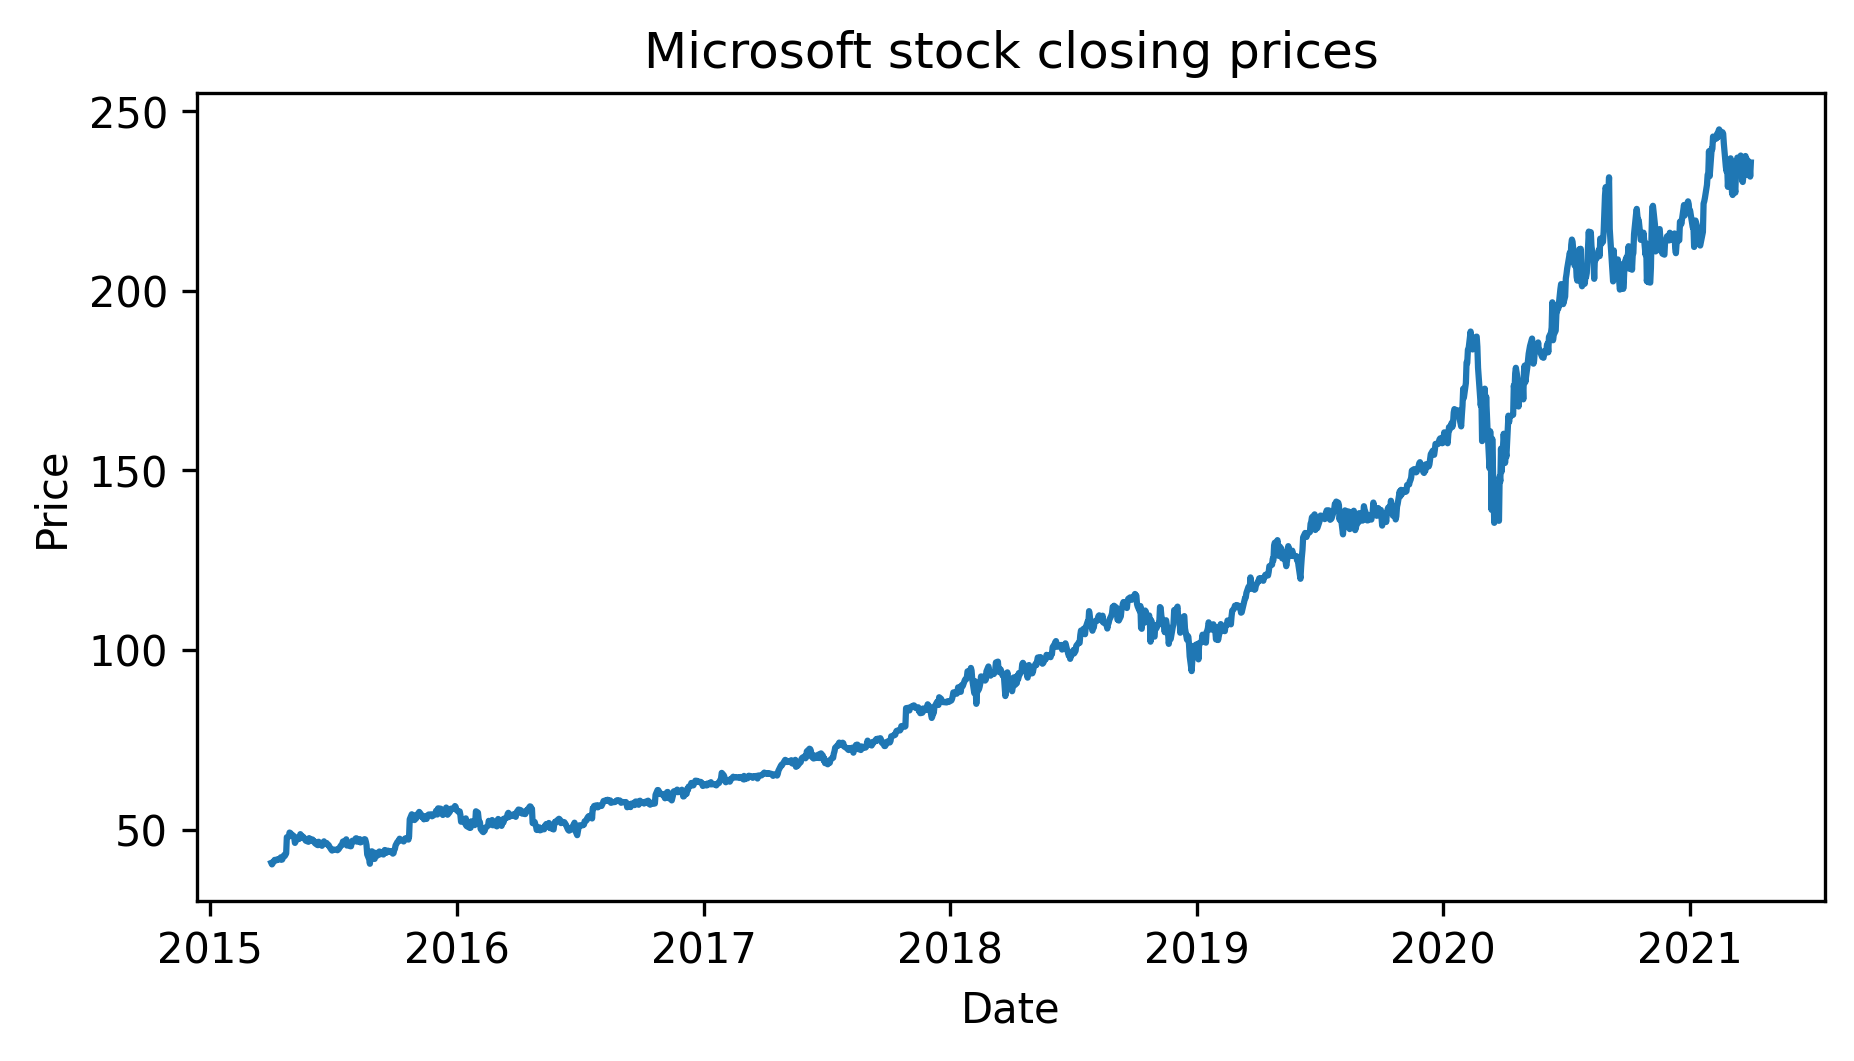

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Setting the Date as index
df = df.set_index('Date')

# Plotting
fig, axe = plt.subplots(figsize=(7, 3.5), dpi=300)
axe.plot(df['Close'])

# Labelling 
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Microsoft stock closing prices")
plt.show()

# Display
#fig.savefig("output/output.png")
#plt.close(fig)

Look at the big drop right at the beginning of 2020. It looks completely off, right? However, we know there was an actual drop all over the stock market at that time due to the COVID pandemic. So, this is probably not an error but what actually happened.

In this case, we could leave that value as it is and create a dummy variable to flag the pandemic period (`1` during that period, `0` outside of it).

# Errors and missing values
Now, let's look at the same data but with an error that we intentionally added.

Text(0.5, 1.0, 'Microsoft stock closing prices')

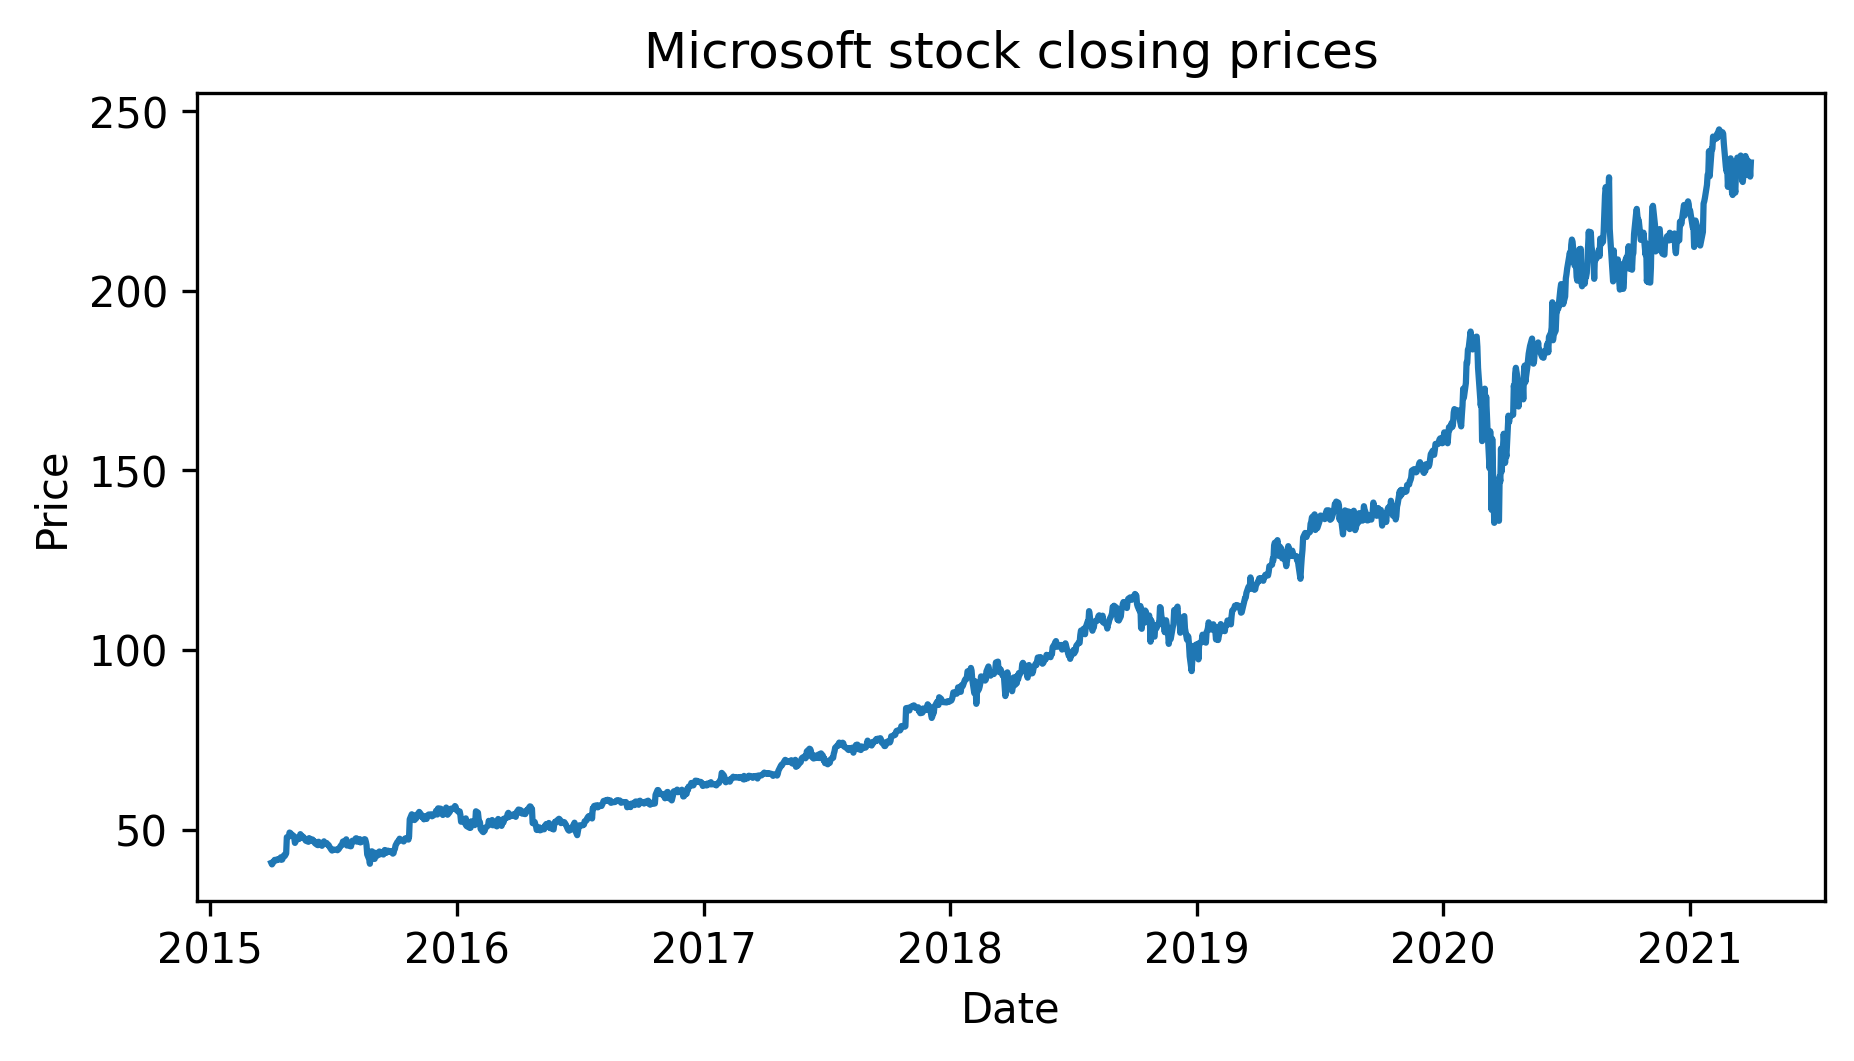

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Setting the Date as index
df = df.set_index('Date')

# Plotting
fig, axe = plt.subplots(figsize=(7, 3.5), dpi=300)
axe.plot(df['Close'])

# Labelling 
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Microsoft stock closing prices")

# Display
#fig.savefig("output/output.png")
#plt.close(fig)

We can see the error in 2019. It could have been caused by the data collection system, or it could have come straight from the source. Either way, we need to get rid of it.

One way would be simply to delete it, leaving us with a missing value. Another way is to replace it with an educated guess. In that case, it could be by the average between the prices that come right before and after it. To make that decision, we first need to understand the process that generates the data. In that case, if on that specific day, the stock market was trading, and there was nothing special happening, the imputation by the average of the preceding and following dates would be the best choice.

# Identifying trends
A trend is a long-term change in data that exists despite the small variations from data point to data point. Although there is no formal limit, if we have a whole year of data, an increase or decrease that lasts for many months could already be considered a trend. It is also possible that there's no trend in the data when the trend line remains horizontal.

One way of identifying a trend is by decomposing a time series into trend, seasonality, and residual (whatever is left after we remove trend and seasonality). This can be done with the seasonal_decompose function from the statsmodels library.
According to their website, statsmodels is “a Python module that provides classes and functions for the estimation of many different statistical models as well as for conducting statistical tests and statistical data exploration.”

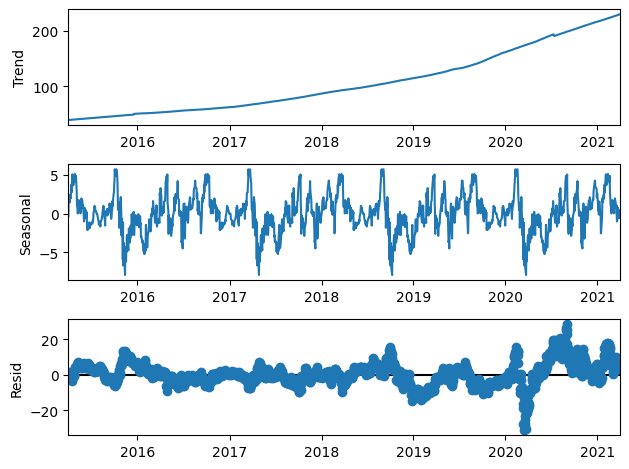

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Setting the Date as index
df = df.set_index('Date')

# Seasonal decomposition
result = seasonal_decompose(
    df['Close'],
    model='additive',
    period=365,
    extrapolate_trend='freq'
    )

# Plot
fig = result.plot(observed=False)

# Display
#fig.savefig("output/output.png")
#plt.close(fig)

First, we have df['Close'], which is our time series.

Then, there’s model, which can take two possible values: 'multiplicative' and 'additive'.

The multiplicative model will treat each value in the time series as the product of trend, seasonality, and residual. 

(value=trend∗seasonality∗residual)

The additive model will treat the values as the sum of those same elements. 
(value=trend+seasonality+residual)

The first element to be estimated is the trend, using a convolution filter. Then, the seasonal component is estimated by removing the trend from the data and calculating the average of the detrended series for each period. The model is simply the way the trend component is removed from the data, and it affects both the seasonal and residual components.

We'll soon see the details of the function parameters and why we set model='additive'. For now, notice that we chose period=365 because we have daily data. Also, the extrapolate_trend='freq' allows the trend to be extrapolated for the beginning and end of the time series. Since we need some time to detect trends, the model would not calculate it at the edges of the series, so we allow it to extrapolate from the rest of the data.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Setting the Date as index
df = df.set_index('Date')

# Seasonal decomposition
result = seasonal_decompose(
    df['Close'],
    model='additive',
    period=365,
    extrapolate_trend='freq'
    )

print(result.trend)

Date
2015-04-01 16:00:00     39.312513
2015-04-02 16:00:00     39.366503
2015-04-06 16:00:00     39.420493
2015-04-07 16:00:00     39.474483
2015-04-08 16:00:00     39.528473
                          ...    
2021-03-25 16:00:00    228.548267
2021-03-26 16:00:00    228.764738
2021-03-29 16:00:00    228.981209
2021-03-30 16:00:00    229.197680
2021-03-31 16:00:00    229.414151
Name: trend, Length: 1511, dtype: float64


# Understanding seasonal patterns
Seasonal patterns (or seasonality) refer to periodical patterns in the data. Weather data, for example, is very seasonal, with average temperatures tending to be close for the same month, regardless of the year.

Now that we know how to decompose a time series into its fundamental components using seasonal_decompose, let's break down the function parameters and results.

# Understanding autocorrelation
Autocorrelation is a measure of the linear relationship between a numeric variable and itself at another point in time. Think of the relationship between the average temperature today and the average temperature a year ago.

# Identifying autocorrelation
There are a few ways to identify autocorrelation, but we will focus on the main one used for time series data—a plot known as an autocorrelogram.

An autocorrelogram will show the correlation between a variable and itself over different periods, called time lags, by plotting the autocorrelation function (ACF). Let's look at an example:

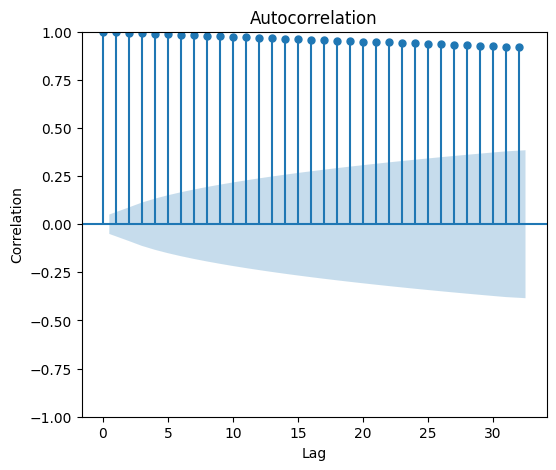

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('microsoft_stock.csv')

# Changing the datatype
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
 
# Setting the Date as index
df = df.set_index('Date')

# Plotting ACF
fig,axe=plt.subplots(figsize=(6,5))
axe.set_xlabel('Lag')
axe.set_ylabel('Correlation')
fig=plot_acf(df['Close'],ax=axe, alpha=0.05)

# Display
# fig.savefig("output/output.png")
# plt.close(fig)

Here we can see a pattern similar to the one we saw before, but the autocorrelation coefficients decrease much more slowly. This means that the correlation between the stock prices on different days remains strong for much longer. Intuitively, we can read this as a sign that current stock prices strongly correlate with past stock prices, even when we go back many days in the past.

We also notice a blue shaded area that was not in the previous picture. It represents the 
95
%
95%
confidence interval. If one of the bars falls within that range, we can consider it not statistically significant (which isn't the case here).

# Understanding stationarity
Stationarity is a property of time series data that indicates the absence of change in the mean and in the variance over time. A stationary time series will be horizontal, meaning it has no trend, and it will change always within a certain range.

Stationarity is an assumption used by some forecasting methods, so it's important to know how to identify it before applying those methods.

# Identifying stationarity
Although there are statistical methods to identify stationarity, it is usually easy to visually inspect time series data to see if it's stationary or not.

Let's first try the visual method to have a better intuition of the concept of stationarity.

The line chart above represents the number of airline passengers over time. As we can see, there is an upwards trend since the numbers tend to get higher and higher.

We can also see an evident seasonality, with consistent lows and lows. Notice how the distance between those highs and lows grows with time. It means there is a significant change in variance over time. All these signs indicate that this process is not stationary since the mean and variance are not constant over time.

Now, let us try a statistical approach—the Augmented Dickey-Fuller Test, a hypothesis test designed to verify the plausibility of the hypothesis that the time series is stationary.

A hypothesis test is a way to test assumptions in a rigorous manner. It takes two hypotheses (the null hypothesis and the alternative hypothesis) and calculates a test statistic, which is different for each test.
Then, it returns a p-value, a number that varies between 
0
0
 and 
1
1
 and tells us how likely we are to observe that specific value for the test statistic if the null hypothesis is true.

In the Augmented Dickey-Fuller Test, the null hypothesis is that the data is stationary, and the alternative hypothesis is that the data is non-stationary. If the p-value for this test is low enough (we can usually consider 
0.05
0.05
 low enough), we reject the null hypothesis and cannot treat our data as stationary.

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller

# df = pd.read_csv('airpassengers.csv')

# # Changing the datatype
# df["Month"] = pd.to_datetime(df['Month'], format='%Y-%m')
 
# # Setting the Date as index
# df = df.set_index('Month')

# # Augmented Dickey-Fuller test
# results = adfuller(df)
# p_value = results[1]
# print('p-value: %f' % p_value)

# Negative autocorrelation
It's also possible to spot negative autocorrelation, as we can see in our Seattle weather dataset.

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf

# df = pd.read_csv('seattle_weather.csv')

# # Changing the datatype
# df["DATE"] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
 
# # Setting the Date as index
# df = df.set_index('DATE')

# # Plotting ACF
# # Plotting ACF
# fig,axe=plt.subplots(figsize=(6,5))
# axe.set_xlabel('Lag')
# axe.set_ylabel('Correlation')
# fig=plot_acf(df['temp_max'], lags=180, ax=axe, alpha=0.05)

# # Display
# # fig.savefig("output/output.png")
# # plt.close(fig)

# Understanding moving averages
Moving averages can refer to two different things in time series forecasting:

A simpler concept, also known as a rolling mean.

The moving average model, also known as MA(n).

The rolling mean is the average of the value we are looking at calculated over a certain period of time. That average is updated according to the period, so it's always relative.

Using weather data as an example, we could look at the average temperature over the past thirty days. If we do that for every day in our data series, we would get the moving average over thirty days for the whole period. Let's see how to do this in practice and how we can use this to make forecasts.

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as dt

# df = pd.read_csv('seattle_weather.csv')

# # Changing the datatype
# df["date"] = pd.to_datetime(df['date'], format='%Y-%m-%d')
 
# # Setting the Date as index
# df = df.set_index('date')

# # Creating the moving average for "temp_max" over 30 days
# df['temp_max_ma'] = df['temp_max'].rolling(window=30).mean()


# # Plotting
# fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
# ax.plot(df['temp_max'], label = "temp_max")
# ax.plot(df['temp_max_ma'], label = "Moving average of temp_max")

# # Formatting axe to make it easier to read
# ax.xaxis.set_major_locator(dt.YearLocator())
# ax.xaxis.set_minor_locator(dt.MonthLocator((1,4,7,10)))

# ax.xaxis.set_major_formatter(dt.DateFormatter("\n%Y"))
# ax.xaxis.set_minor_formatter(dt.DateFormatter("%b"))
# plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
# plt.subplots_adjust(bottom=0.15)

# # Labelling 
# plt.xlabel("Date")
# plt.ylabel("Temperature (max)")
# plt.title("Seattle daily max temperature")
# plt.legend()

# fig.savefig("output/output.png")
# plt.close(fig)

# Forecasting with moving averages
To use moving averages for forecasting, we usually apply the second version of the moving average concept, which we will call an MA(n) model.

�
�
=
�
+
�
�
+
�
1
�
�
−
1
+
.
.
.
+
�
�
�
�
−
�
x 
t
​
 =μ+w 
t
​
 +θ 
1
​
 w 
t−1
​
 +...+θ 
n
​
 w 
t−n
​
 

Where:

�
�
x 
t
​
 
 is the variable we are trying to predict at time 
�
t
.

�
μ
 is the mean of 
�
X
.

�
�
−
�
w 
t−n
​
 
 is white noise at the time 
�
−
�
t−n
.

�
�
−
�
θ 
t−n
​
 
 is the parameter linked to 
�
�
−
�
w 
t−n
​
 
. The higher it is, the stronger the dependence between 
�
�
x 
t
​
 
 and 
�
�
−
�
w 
t−n
​
 
.

Thankfully, we don't need to implement this from scratch in Python, and we can use the statsmodels library, which uses the ARIMA function.